In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.max_columns =None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df=pd.read_csv('/content/houses_Madrid_cleaned (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28190 entries, 0 to 28189
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         28190 non-null  int64  
 1   id                 28190 non-null  int64  
 2   destrict           28190 non-null  object 
 3   sq_mt_built        28190 non-null  float64
 4   n_rooms            28190 non-null  float64
 5   n_bathrooms        28190 non-null  int64  
 6   buy_price          28190 non-null  float64
 7   buy_price_by_area  28190 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
df.id=df.id.astype(object)

Univariate Analysis

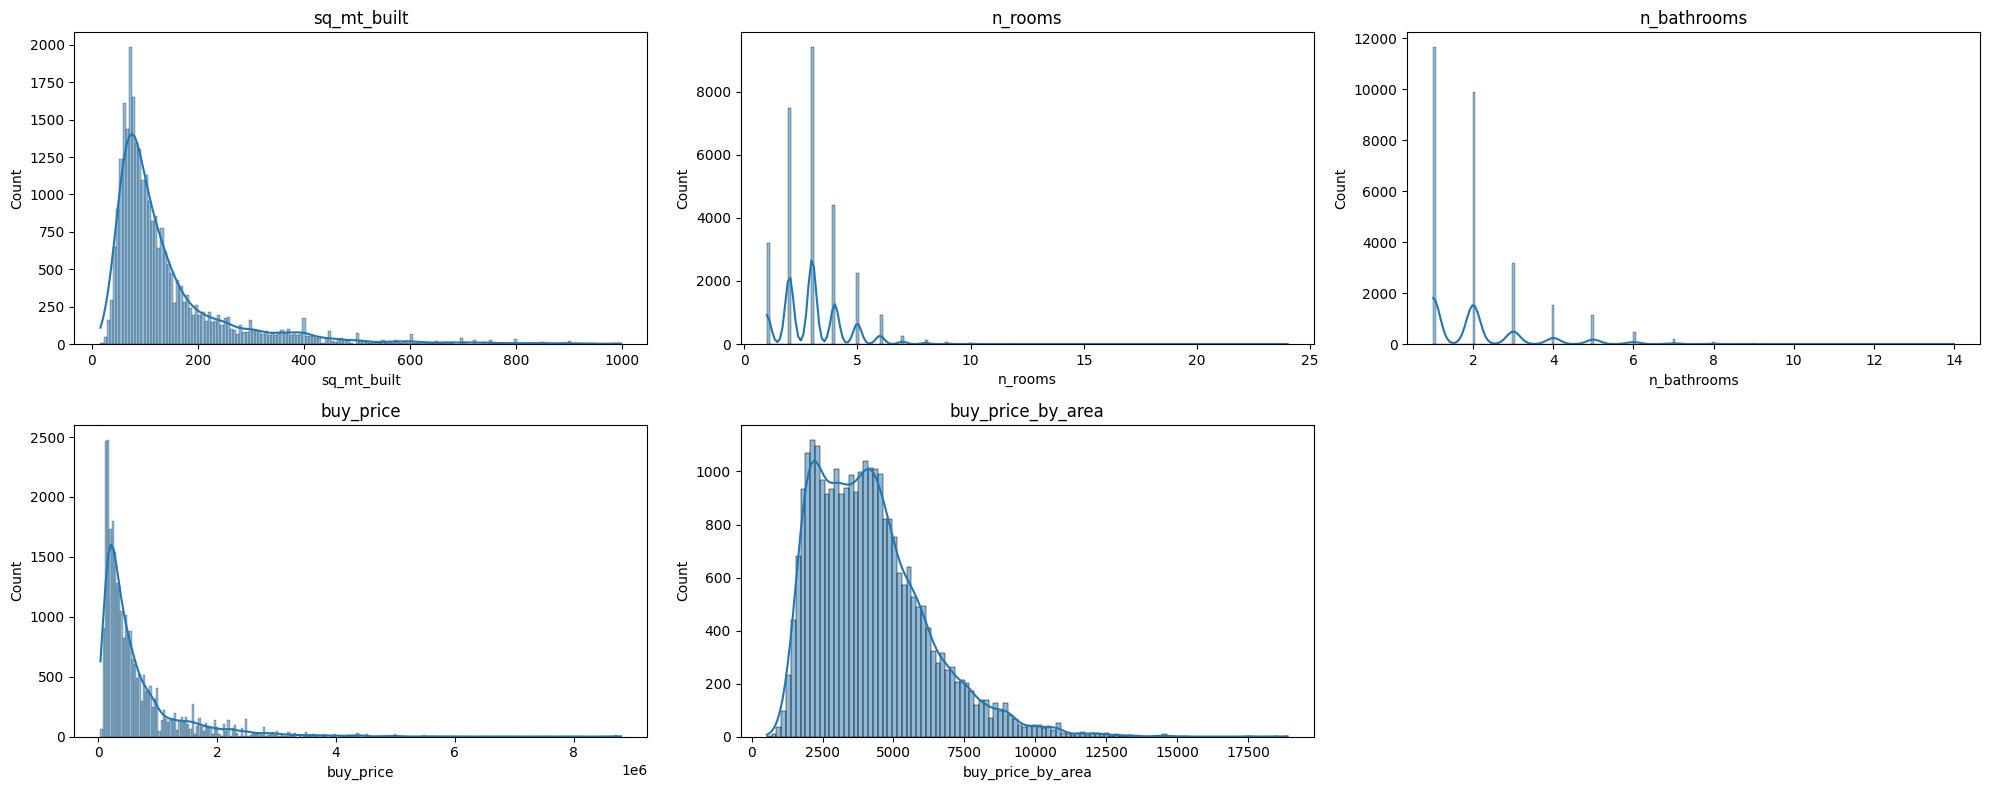

In [ ]:
#Neumircal columns
plt.figure(figsize=(20,8))
for e,i in enumerate(df.columns[3:]):
  plt.subplot(2,3,e+1)
  plt.title(i)
  sns.histplot(df[i], kde=True)
  plt.tight_layout();

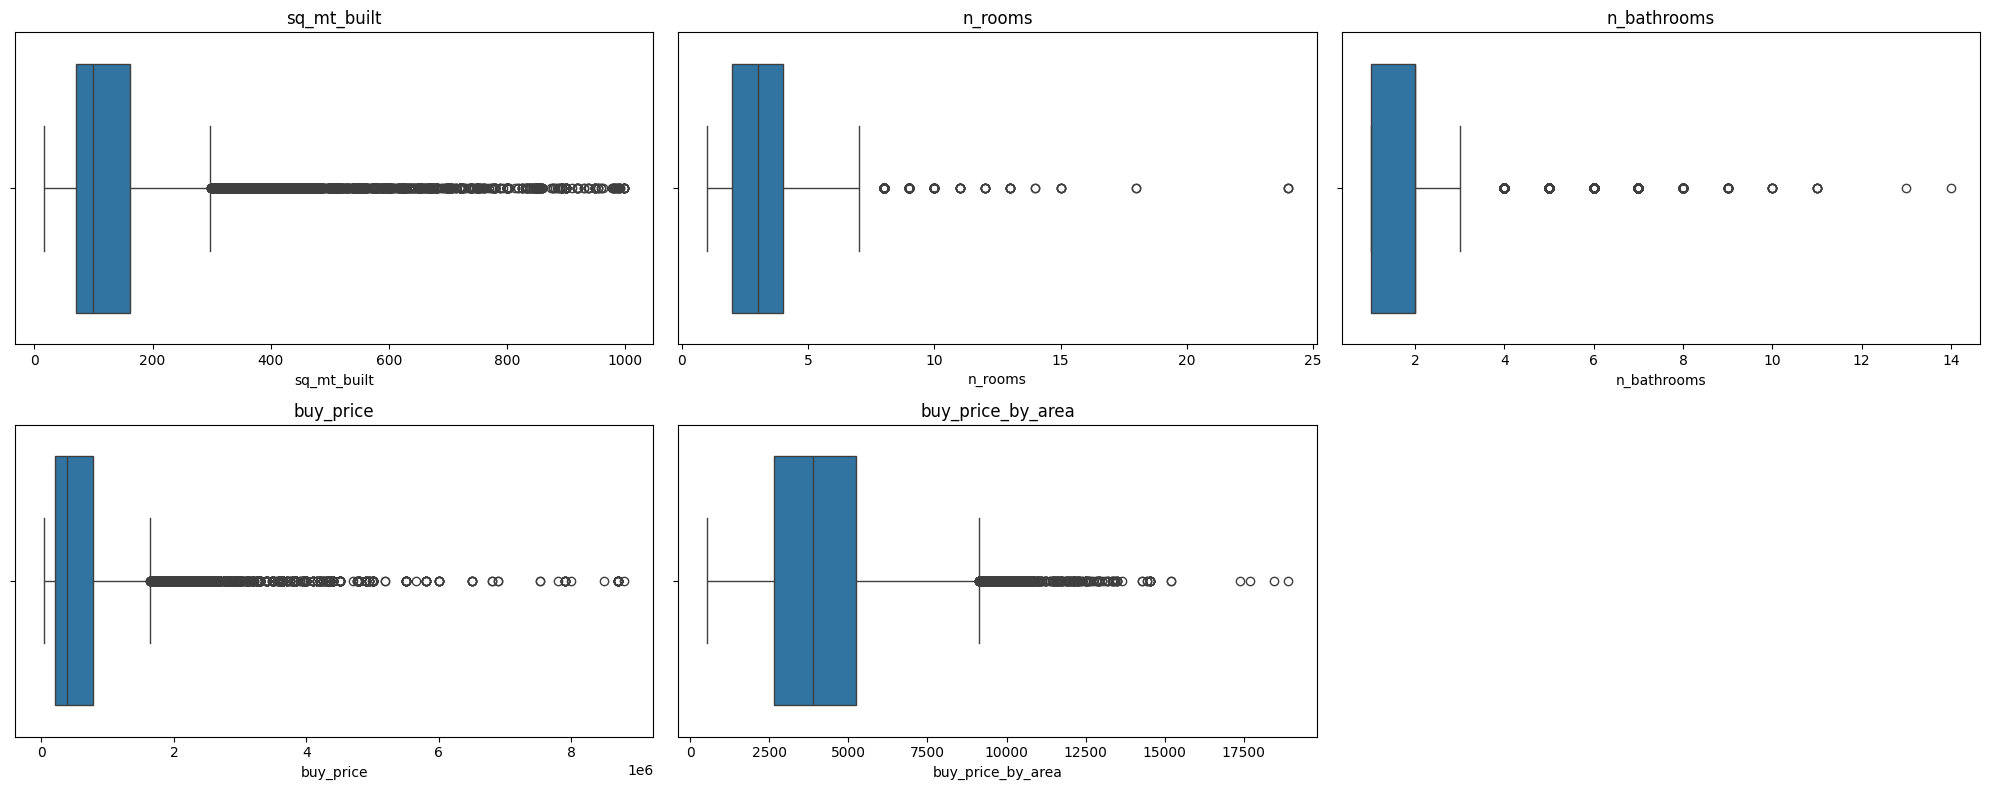

In [ ]:
plt.figure(figsize=(20,8))
for e,i in enumerate(df.columns[3:]):
  plt.subplot(2,3,e+1)
  plt.title(i)
  sns.boxplot(x=df[i])
  plt.tight_layout();

In [ ]:
import plotly.express as px
px.bar(df.destrict.value_counts(), title= 'Distribution of Districts in Madrid')

# Bivariate Analysis


In [ ]:
corr = df[['buy_price','sq_mt_built', 'n_rooms', 'n_bathrooms']]

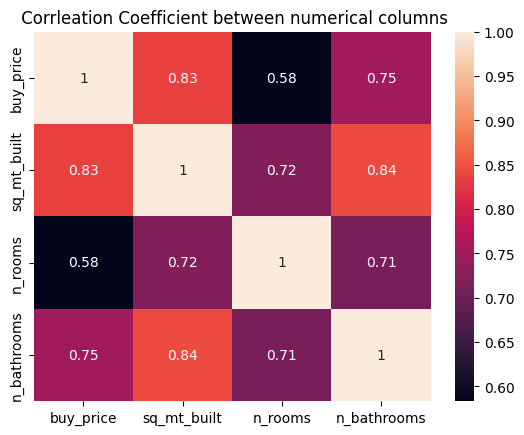

In [ ]:
sns.heatmap(corr.corr(), annot=True)
plt.title(' Corrleation Coefficient between numerical columns');

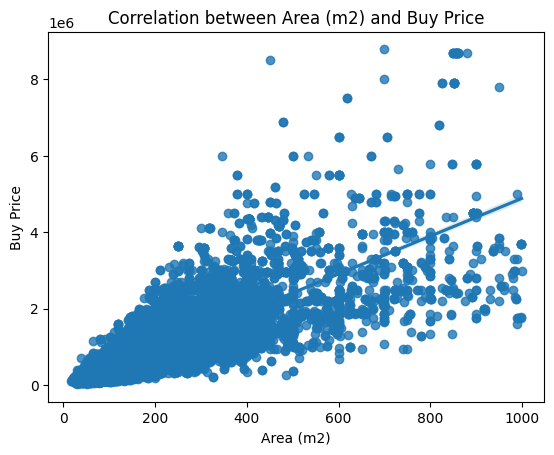

In [ ]:
sns.regplot(data=df, x='sq_mt_built', y='buy_price')
plt.title("Correlation between Area (m2) and Buy Price")
plt.xlabel('Area (m2)')
plt.ylabel('Buy Price');


# Location or Size
From searching we find that the brise by area is **most** effective

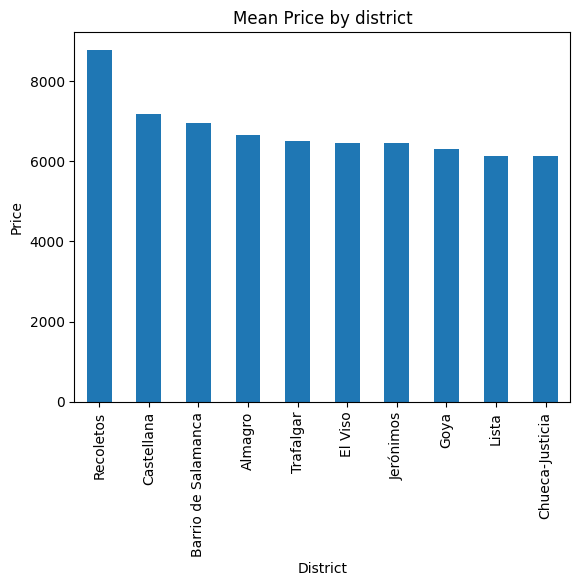

In [ ]:
mean_price = df.groupby('destrict')['buy_price_by_area'].mean().round(2).sort_values(ascending=False)
mean_price.head(10).plot(kind='bar', xlabel='District', ylabel= 'Price', title='Mean Price by district');


# Linear regression

In [6]:
reco=df.query('destrict=="Recoletos"')
reco['intercept']=1
reco.head()

<ipython-input-6-870496b4e9e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco['intercept']=1


,Unnamed: 0,id,destrict,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,intercept
10083,10326,2640,Recoletos,114.00,4.00,1,750000.00,6579.00,1
10087,10330,2636,Recoletos,250.00,3.00,4,2990000.00,11960.00,1
10091,10334,2632,Recoletos,187.00,3.00,3,1450000.00,7754.00,1
10098,10341,2625,Recoletos,417.00,7.00,6,2500000.00,5995.00,1
10101,10344,2622,Recoletos,127.00,2.00,2,990000.00,7795.00,1


In [10]:
import statsmodels.api as sm
lm=sm.OLS(reco['buy_price'], reco[['intercept', 'sq_mt_built']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           4.00e-89
Time:                        20:33:56   Log-Likelihood:                -3308.2
No. Observations:                 226   AIC:                             6620.
Df Residuals:                     224   BIC:                             6627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -4.342e+04   7.53e+04     -0.577      0.565   -1.92e+05    1.05e+05
sq_mt_built  8975.6204    268.163     33.471      0.000    8447.175    9504.066
==============================================================================
Omnibus:                       19.779   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.095
Skew:                           0.512   Prob(JB):                     1.07e-07
Kurtosis:                       4.536   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
x=5000
price=4.3420+8975.6204*x
print (price)

44878106.342


# Multi linear regression

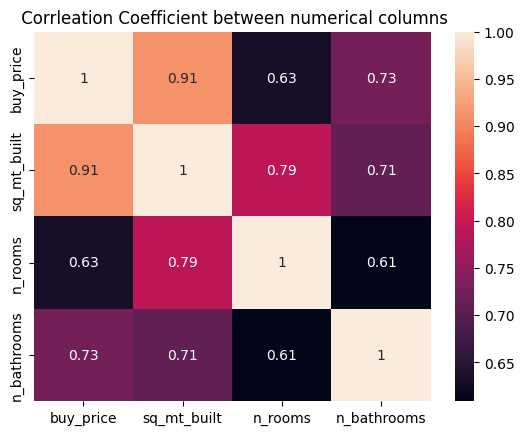

In [13]:
corr=reco[['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms']]
sns.heatmap(corr.corr(), annot=True)
plt.title(' Corrleation Coefficient between numerical columns');

In [14]:
lm=sm.OLS(reco['buy_price'], reco[['intercept', 'sq_mt_built', 'n_rooms', 'n_bathrooms']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     499.4
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.19e-98
Time:                        20:52:46   Log-Likelihood:                -3279.3
No. Observations:                 226   AIC:                             6567.
Df Residuals:                     222   BIC:                             6580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.068e+05   9.03e+04      1.182      0.238   -7.12e+04    2.85e+05
sq_mt_built  9686.1051    436.232     22.204      0.000    8826.419    1.05e+04
n_rooms     -2.292e+05   3.51e+04     -6.526      0.000   -2.98e+05    -1.6e+05
n_bathrooms  1.679e+05   3.09e+04      5.429      0.000    1.07e+05    2.29e+05
==============================================================================
Omnibus:                       23.375   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.885
Skew:                           0.517   Prob(JB):                     6.59e-11
Kurtosis:                       4.977   Cond. No.                         804.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#you can get price from this eq
#price = intercept +intercept(sq_mt_built)*area +intercept(n_rooms)*n_ofroom+intercept(n_bathrooms	)*n_of_bath

# DUMMY VARIABLE

In [16]:
df.destrict.nunique()

146

In [25]:
df_dummy = df.query('destrict in ("Recoletos", "Castellana", "Trafalgar")')
df_dummy.head()

,Unnamed: 0,id,destrict,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
10055,10297,2669,Castellana,183.00,2.00,3,1375000.00,7514.00
10082,10325,2641,Castellana,153.00,4.00,2,830000.00,5425.00
10083,10326,2640,Recoletos,114.00,4.00,1,750000.00,6579.00
10087,10330,2636,Recoletos,250.00,3.00,4,2990000.00,11960.00
10090,10333,2633,Castellana,250.00,5.00,5,2200000.00,8800.00


In [27]:
pd.get_dummies(df_dummy.destrict).head()

,Castellana,Recoletos,Trafalgar
10055,True,False,False
10082,True,False,False
10083,False,True,False
10087,False,True,False
10090,True,False,False


In [29]:
df_dummy[['Cast', 'Reco', 'Traf']] = pd.get_dummies(df_dummy['destrict'], dtype= 'int')
df_dummy.head()

<ipython-input-29-3c93c606297e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy[['Cast', 'Reco', 'Traf']] = pd.get_dummies(df_dummy['destrict'], dtype= 'int')
<ipython-input-29-3c93c606297e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy[['Cast', 'Reco', 'Traf']] = pd.get_dummies(df_dummy['destrict'], dtype= 'int')
<ipython-input-29-3c93c606297e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Unnamed: 0,id,destrict,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,Cast,Reco,Traf
10055,10297,2669,Castellana,183.00,2.00,3,1375000.00,7514.00,1,0,0
10082,10325,2641,Castellana,153.00,4.00,2,830000.00,5425.00,1,0,0
10083,10326,2640,Recoletos,114.00,4.00,1,750000.00,6579.00,0,1,0
10087,10330,2636,Recoletos,250.00,3.00,4,2990000.00,11960.00,0,1,0
10090,10333,2633,Castellana,250.00,5.00,5,2200000.00,8800.00,1,0,0


In [30]:
df_dummy['intercept'] = 1

lm = sm.OLS(df_dummy.buy_price, df_dummy[['intercept', 'Cast', 'Traf']])

result = lm.fit()

result.summary()

<ipython-input-30-69cf2814fad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     128.1
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           5.65e-47
Time:                        21:24:17   Log-Likelihood:                -9087.1
No. Observations:                 597   AIC:                         1.818e+04
Df Residuals:                     594   BIC:                         1.819e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.155e+06   6.58e+04     32.743      0.000    2.03e+06    2.28e+06
Cast       -7.785e+05   1.03e+05     -7.587      0.000    -9.8e+05   -5.77e+05
Traf       -1.512e+06   9.45e+04    -15.998      0.000    -1.7e+06   -1.33e+06
==============================================================================
Omnibus:                      186.572   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.722
Skew:                           1.468   Prob(JB):                    8.90e-134
Kurtosis:                       7.002   Cond. No.                         3.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
df_dummy['intercept'] = 1

lm = sm.OLS(df_dummy.buy_price, df_dummy[['intercept', 'Cast', 'Traf', 'sq_mt_built']])

result = lm.fit()

result.summary()

<ipython-input-31-795dfde01410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1242.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):          3.46e-255
Time:                        21:27:29   Log-Likelihood:                -8601.4
No. Observations:                 597   AIC:                         1.721e+04
Df Residuals:                     593   BIC:                         1.723e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     2.18e+05    4.9e+04      4.451      0.000    1.22e+05    3.14e+05
Cast        -3.583e+05   4.63e+04     -7.737      0.000   -4.49e+05   -2.67e+05
Traf        -3.921e+05   4.77e+04     -8.223      0.000   -4.86e+05   -2.98e+05
sq_mt_built  7908.2471    160.575     49.250      0.000    7592.882    8223.612
==============================================================================
Omnibus:                      139.239   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.006
Skew:                           0.971   Prob(JB):                    2.12e-138
Kurtosis:                       7.660   Cond. No.                         867.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""